In [1]:
# %load ~/dotfiles/root/usr/local/share/pythonstartup.py
import cmath
import functools
import itertools
import math
import os
import sys

from cmath import phase, polar
from functools import namedtuple, partial
from pprint import pprint
from time import time, sleep
from timeit import timeit

import cv2
import matplotlib.pyplot as plt
import numpy as np

from numpy import array, arange, concatenate, ones, ones_like, zeros, zeros_like
from numpy import exp, log, log2, log10, sqrt, ceil, floor
from numpy import pi, sin, cos, tan, arcsin, arccos, arctan, arctan2, degrees, radians
from scipy import optimize, signal
from scipy.constants import *

j = 1.j

np.set_printoptions(precision=3)

def E(x, precision=3):
    return ('{:.' + str(precision) + 'E}').format(x)

def print(*args):
    def reformat(x):
        return (
            "{:.3f}".format(x) if isinstance(x, float)   else
            "{:.3f}".format(x) if isinstance(x, complex) else
            x)
    __builtins__.print(*map(reformat, args))

def namestr(obj, namespace):
    return next(name for name in namespace if namespace[name] is obj)

def printn(*args, namespace=globals(), padding=20):
    for x in args:
        print(namestr(x, namespace).ljust(padding), x)


In [2]:
#%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt

# Constants
eta_0 = 376.73
c_0   = c

In [3]:
# HW1 Q1

w = 2 * pi * 2.4e9
E0 = 5

mu = mu_0
eps = 2.54 * epsilon_0

eta = sqrt(mu / eps)
H = (1 / eta) * E0

c = 1 / sqrt(eps * mu)
vp = c

k = w / vp

dx = 0.15 - 0.1
dphi = degrees(-k * dx)

printn(*[eta, H, vp, k, dphi])

eta                  236.382
H                    0.021
c                    188106518.109
k                    80.165
dphi                 -229.657


In [4]:
# HW1 Q2

# WRONG assumptions
# eta = eta_0 * sqrt(1 / 3) / idk
# R = (eta - eta_0) / (eta + eta_0) # no... this is only true when going from eta_0 -> eta, I believe
# Sin = 100**2 / eta.conj() * (1 - abs(R)**2 + R - R.conj())

def Ei_(z, gamma): return 100 * exp(-gamma * z)
def Er_(z, gamma, R, l): return R * Ei_(l, gamma) * exp(-gamma * (l - z))

loss_tan = 0.1
w   = 2 * pi * 3e9
eps = 3 * epsilon_0
mu  = mu_0
R   = -1
l   = 0.2

sigma = w * eps * loss_tan
idk   = sqrt(1 - 1j * sigma / (w * eps))
gamma = 1j * w * sqrt(mu * eps) * idk
eta   = 1j * w * mu / gamma

Ei = partial(Ei_, gamma=gamma)
Er = partial(Er_, gamma=gamma, R=R, l=l)

# Shouldn't this be real part?
# But if I use real part, I get wrong answers.
Si = abs(Ei(0.0)**2 / eta.conj())
Sr = abs(Er(0.0)**2 / eta.conj())
Si_minus_Sr = Si - Sr

def Hi(*args): return  Ei(*args) / eta
def Hr(*args): return -Er(*args) / eta

Et  = Ei(0) - Er(0)
Ht  = Hi(0) - Hr(0)
Sin = abs(Et * Ht.conj())

printn(*[gamma, eta, Si, Sr, Si_minus_Sr, Sin])

gamma                5.438+109.039j
eta                  216.696+10.808j
Si                   46.090
Sr                   0.594
Si_minus_Sr          45.496
Sin                  45.650


In [5]:
# HW1 Q3

L = 0.5e-6
C = 200e-12
R = 4
G = 0.02

w = 2 * pi * 800e6

RL = R + j*w*L
GC = G + j*w*C
gamma = sqrt(RL * GC)
Z0    = sqrt(RL / GC)

l = 0.30
alpha = gamma.real
attenuation  = 20 * log10(exp(-alpha * l))

R = 0
G = 0
RL = R + j*w*L
GC = G + j*w*C
gamma_lossless = sqrt(RL * GC)
Z0_lossless    = sqrt(RL / GC)

printn(*[gamma, Z0, alpha, attenuation, gamma_lossless, Z0_lossless])

gamma                0.540+50.268j
Z0                   49.993+0.457j
alpha                0.540
attenuation          -1.407
gamma_lossless       0.000+50.265j
Z0_lossless          50.000+0.000j


Z1                   54.772


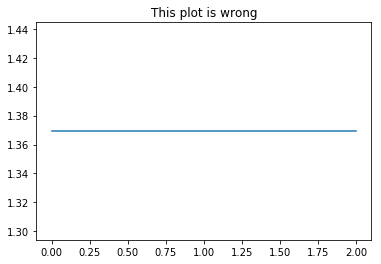

In [6]:
# HW1 Q4

Z0 = 75
ZL = 40

Z1 = sqrt(Z0 * ZL)

def SWR(R):
    return (1 + np.abs(R)) / (1 - np.abs(R))

def R(Zin, Z0):
    return (Zin - Z0) / (Zin + Z0)

def Zin(Bl):
    return Z1 * (ZL + j * Z1 * np.tan(Bl)) / (Z1 + j * ZL * np.tan(Bl))

# TODO Plot?
x = np.linspace(0, 2, 100)
y = SWR(R(Zin(x), Z1))
plt.plot(x, y)
plt.title("This plot is wrong")

printn(Z1)

In [7]:
# HW1 Q5

Z0    = 50
SWR   = 2.5
dist  = 0.9e-2
lmbda = 2 * 2.1e-2

dist_ = dist / lmbda
ZL = Z0 * (2 - 0.9j)

printn(*[dist_, ZL])

dist_                0.214
ZL                   100.000-45.000j


In [8]:
# HW1 Q6

Z0 = 100
SWR = 3.5
dist_ = 0.1

ZL = Z0 * (0.42 - 0.64j)

printn(*[dist_, ZL])

dist_                0.100
ZL                   42.000-64.000j
